In [13]:
# Load and plot an ELR prediction netCDF file

import numpy as np
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import netCDF4 as nc

In [72]:
# Load a netCDF file

data_dir = "/Users/cooperf/Documents/WFP/Operational/SEWAA-forecasts/interface/ensemble_logistic_regression/ELR_predictions"

#file_name = f"{data_dir}/Kenya/county/GAN_Kiambu_20240423_logreg.nc"
#file_name = f"{data_dir}/Kenya/county/GAN_Nairobi_20240423_logreg.nc"
#file_name = f"{data_dir}/Kenya/subcounty/GAN_Kajiado-East_20240423_logreg.nc"
#file_name = f"{data_dir}/Ethiopia/county/GAN_Konso_20240423_logreg.nc"
file_name = f"{data_dir}/Ethiopia/subcounty/GAN_Moyale_20240423_logreg.nc"

nc_file = nc.Dataset(file_name, "r")
latitude = np.array(nc_file["latitude"][:])
longitude = np.array(nc_file["longitude"][:])
time = np.array(nc_file["time"][:])
valid_time = np.array(nc_file["fcst_valid_time"][:])
threshold = np.array(nc_file["threshold"][:])
probability_exceedance = np.array(nc_file["probability_exceedance"][:])
nc_file.close()

In [73]:
valid_time

array([0, 1, 2, 3, 4])

In [80]:
threshold

array([25, 30, 35, 40])

In [74]:
probability_exceedance[0,0,0,:,:]

array([[0.18091496, 0.20394218, 0.20383822, 0.20174812,        nan,
               nan,        nan,        nan],
       [0.17868069, 0.1953292 , 0.21709859, 0.20683424,        nan,
               nan,        nan,        nan],
       [0.18938565, 0.21526673, 0.20131901, 0.21311483,        nan,
               nan,        nan,        nan],
       [0.22214583, 0.24150937, 0.20778263, 0.21469433, 0.20201187,
               nan,        nan,        nan],
       [0.18863532, 0.2150905 , 0.22820758, 0.23211158, 0.22626743,
        0.20774767,        nan,        nan],
       [       nan, 0.2214008 , 0.22622343, 0.23167319, 0.22600302,
        0.24344138, 0.24724246, 0.24106209],
       [       nan,        nan,        nan,        nan, 0.22652511,
        0.25230721, 0.24770079, 0.24012441],
       [       nan,        nan,        nan,        nan,        nan,
        0.22922812,        nan,        nan]])

In [75]:
lead_time = 0
temp = np.zeros(probability_exceedance[0,lead_time,0,:,:].shape)
temp[probability_exceedance[0,lead_time,0,:,:]*100<5] = 0
temp[probability_exceedance[0,lead_time,0,:,:]*100>=5] += 1
temp[probability_exceedance[0,lead_time,0,:,:]*100>=15] += 1
temp[probability_exceedance[0,lead_time,0,:,:]*100>=25] += 1
temp[probability_exceedance[0,lead_time,0,:,:]*100>=50] += 1

In [76]:
temp

array([[2., 2., 2., 2., 0., 0., 0., 0.],
       [2., 2., 2., 2., 0., 0., 0., 0.],
       [2., 2., 2., 2., 0., 0., 0., 0.],
       [2., 2., 2., 2., 2., 0., 0., 0.],
       [2., 2., 2., 2., 2., 2., 0., 0.],
       [0., 2., 2., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 2., 3., 2., 2.],
       [0., 0., 0., 0., 0., 2., 0., 0.]])

In [77]:
longitude

array([39.04999924, 39.15000153, 39.25      , 39.34999847, 39.45000076,
       39.54999924, 39.65000153, 39.75      ])

In [78]:
latitude

array([3.54999995, 3.6500001 , 3.75      , 3.8499999 , 3.95000005,
       4.05000019, 4.1500001 , 4.25      ])

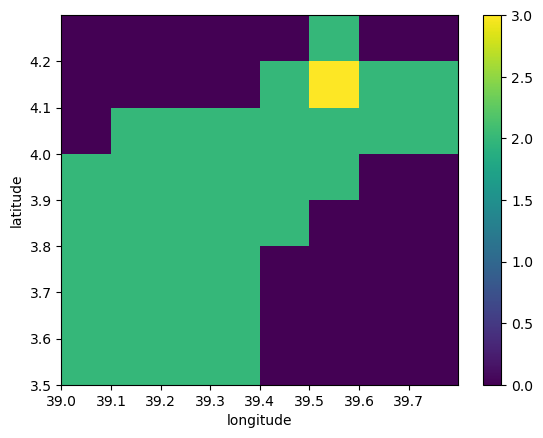

In [79]:
plt.pcolormesh(longitude, latitude, temp)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.colorbar()
plt.show()

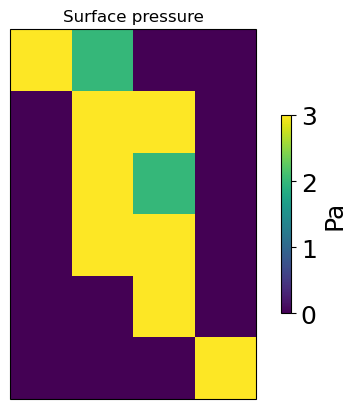

In [47]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=1)
c = plt.pcolormesh(longitude, latitude, temp, transform=ccrs.PlateCarree())
cb = plt.colorbar(c, fraction=0.02)
cb.ax.tick_params(labelsize=18)
cb.set_label('Pa',size=18)
plt.title(f"Surface pressure")
plt.show()

In [ ]:
# Plus the nan mask